# Unit 5 - Financial Planning

In [66]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [67]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [68]:
# Set current amount of crypto assets
my_BTC = 1.2
my_ETH = 5.3

In [69]:
# Crypto API URLs
BTC_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
ETH_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [70]:
# Fetch current BTC price
BTC_response_data = requests.get(BTC_url)

# Fetch current ETH price
ETH_response_data = requests.get(ETH_url)

# Compute current value of my crpto
import json
btc_data = BTC_response_data.json()
my_BTC_value = my_BTC * btc_data['data']['1']['quotes']['CAD']['price']

ETH_data = ETH_response_data.json()
my_ETH_value = my_ETH * ETH_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f'The current value of your {my_BTC} BTC is ${my_BTC_value:0.2f}')
print(f'The current value of your {my_ETH} ETH is ${my_ETH_value:0.2f}')

The current value of your 1.2 BTC is $48023.77
The current value of your 5.3 ETH is $15941.58


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [71]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [72]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api_Object = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='V2')



In [73]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
Closing_prices = api_Object.get_barset(tickers,
                            timeframe,
                            start=start_date,limit=1000).df

# Preview DataFrame
Closing_prices.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-06-08 00:00:00-04:00  116.81  117.1092  116.7501  117.020  15737748   
2020-06-09 00:00:00-04:00  117.31  117.3300  117.1900  117.190  10803958   
2020-06-10 00:00:00-04:00  117.25  117.6800  117.1850  117.665   9007660   
2020-06-11 00:00:00-04:00  117.73  117.8000  117.4350  117.460  11776174   
2020-06-12 00:00:00-04:00  117.60  117.7000  117.5700  117.640   1790030   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-06-08 00:00:00-04:00  320.22  323.4100  319.6300  323.25   64329574  
2020-06-09 00:00:00-04:00  320.30  323.2849  319.3600  320.81   67642220  
2020-06-10 00:00:00-04:00  321.42  322.3900  318.2209  319.01   84064921  
2020-06-11 00:00:00-04:00  311.46  312.1500  300.0100  300.62  182628939  
2020-06-12 00:00:00-04:00  308.24  309.0800  298.6000  304.28  168502612

In [74]:
# Pick AGG and SPY close prices
agg_close_price = Closing_prices['AGG']['close'][0]
spy_close_price = Closing_prices['SPY']['close']['2021-01-13']

# Print AGG and SPY close prices
print(f'Current AGG closing price: ${agg_close_price}')
print(f'Current SPY closing price: ${spy_close_price}')

Current AGG closing price: $117.02
Current SPY closing price: $379.76


In [75]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18988.00
The current value of your 200 AGG shares is $23404.00


### Savings Health Analysis

In [76]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

# Create savings DataFrame
crypto_value = my_BTC_value + my_ETH_value
shares_value = my_spy_value + my_agg_value
df = {'amount' : {
        "crypto" : crypto_value,
        "shares" : shares_value
        }
    }
df_savings = pd.DataFrame(df)

# Display savings DataFrame
display(df_savings)

,amount
crypto,63965.354319
shares,42392.000000


<AxesSubplot:title={'center':'Composition of Personal Assets'}, ylabel='amount'>

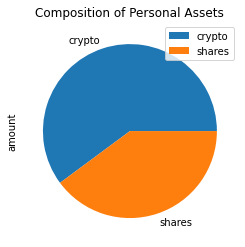

In [77]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Assets')

In [78]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df['amount']['crypto'] + df['amount']['shares']

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! Your emergency fund is sufficiently funded.')
elif total_savings == emergency_fund:
    print(f'Congratulations! You appear to have achieved your financial goal.')
else:
    amount_to_goal = emergency_fund - total_savings
    print(f'You are ${amount_to_goal:.2f} short of achieving your target. I suggest continuing your savings plan as your financial target is within reach!')

Congratulations! Your emergency fund is sufficiently funded.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [79]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-06', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-06', tz='America/New_York').isoformat()


In [80]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

stock_data_df = api_Object.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df


# Display sample data
stock_data_df.count


<bound method DataFrame.count of                               AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-06-14 00:00:00-04:00  110.00  110.18  109.850  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.90  109.780  109.870  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.850  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.740  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.800  109.975  2010628.0   
...                           ...     ...      ...      ...        ...   
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451.0   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159.0   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317.0   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096.0   
2021-

In [81]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_Carlo_even_dist = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [82]:
# Printing the simulation input data
Monte_Carlo_even_dist.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-06-14 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2017-06-15 00:00:00-04:00    -0.000728  242.68  243.91  242.3600  243.79   
2017-06-16 00:00:00-04:00     0.000683  242.77  242.83  241.6337  242.63   
2017-06-19 00:00:00-04:00    -0.001410  243.59  244.73  243.4800  244.64   
2017-06-20 00:00:00-04:00     0.001685  244.25  244.26  242.9900  243.04   

                                                    
                               volume daily_return  
time                                                
2017-06-14 00:00:00-04:00         NaN          NaN  
2017-06-15 00:00:00-04:00  51523068.0          NaN  
2017-06-16 00:00:00-04:00  48998243.0    -0.004758  
2017-06-19 00:00:00-04:00  42503652.0     0.008284  
2017-06-20 00:00:00-04:00  39203167.0    -0.006540

In [83]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_Carlo_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996754,0.998072,0.990084,0.995504,1.012046,0.999007,0.996382,0.995358,0.998319,0.990994,...,1.003380,0.994412,1.003231,0.990710,1.012270,1.003812,1.008892,0.998997,1.002178,0.999099
2,0.986920,1.007666,0.991469,0.994386,1.003363,0.993933,0.993686,0.996252,1.011775,0.985881,...,1.015024,0.992869,0.992850,1.005139,1.017376,1.011615,1.004830,1.004049,1.004149,0.984672
3,0.989369,1.012817,0.997196,0.996381,1.004581,0.978208,1.004777,1.013838,1.022648,0.996419,...,1.009392,0.991105,0.986724,1.000178,1.018887,1.003912,1.010393,1.010970,1.004777,0.983029
4,0.988955,1.003103,0.998998,0.986994,1.019224,0.970037,1.002867,1.024613,1.022957,0.989678,...,1.002873,0.989343,0.981268,1.006737,1.029967,1.019088,1.005589,0.998036,1.017830,0.986108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.174781,55.001253,91.224587,40.587992,19.883558,8.592338,3.159876,20.712111,16.784416,33.078035,...,5.888402,20.833648,12.431117,25.535899,35.890292,28.450271,12.783597,17.674135,16.860758,17.364326
7557,12.120297,55.003547,90.855507,40.578446,19.620138,8.431406,3.156533,20.829258,17.007068,33.199808,...,5.933900,20.859643,12.273704,24.944481,35.963549,28.215667,12.993923,17.731891,16.804277,17.357562
7558,12.039687,54.231583,90.882417,40.860950,19.791366,8.238415,3.160281,20.785678,16.885974,33.296178,...,5.838813,20.905566,12.322370,24.975786,35.952394,28.435089,12.991836,17.975026,16.820884,17.426747
7559,12.020094,54.540475,90.095002,40.311012,19.751954,8.246558,3.157062,21.080805,16.886295,33.380594,...,5.832952,21.064595,12.345748,24.825962,35.839170,28.414780,13.050765,18.126464,16.765332,17.602796


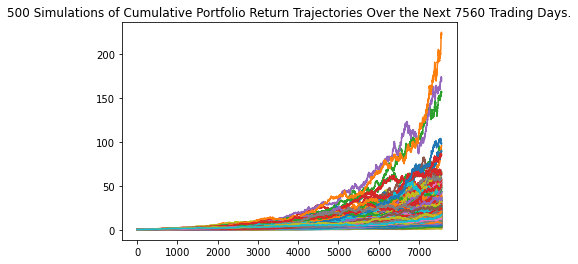

In [87]:
# Plot simulation outcomes
Line_plot = Monte_Carlo_even_dist.plot_simulation()

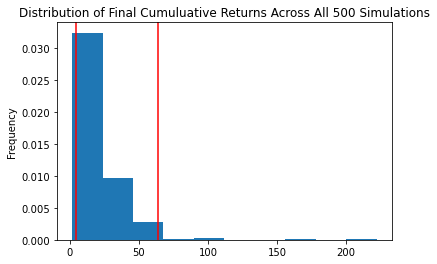

In [88]:
# Plot probability distribution and confidence intervals
Dist_plot = Monte_Carlo_even_dist.plot_distribution()

### Retirement Analysis

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
Sum_Stats = Monte_Carlo_even_dist.summarize_cumulative_return()

# Print summary statistics
print(Sum_Stats)

count           500.000000
mean             20.913228
std              19.475785
min               1.678765
25%              10.162405
50%              15.623688
75%              25.632458
max             221.868465
95% CI Lower      4.319468
95% CI Upper     64.080988
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [90]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(Sum_Stats[8]*initial_investment,2)
ci_upper = round(Sum_Stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86389.37 and $1281619.75


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [91]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Sum_Stats[8]*initial_investment,2)
ci_upper = round(Sum_Stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129584.05 and $1922429.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Monte_Carlo_even_5_dist = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 5)

In [93]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Monte_Carlo_even_5_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993645,1.014501,0.996836,1.000186,0.999138,1.004822,0.996850,1.005300,1.004273,1.000405,...,1.000465,1.006906,0.993909,1.009433,1.013046,1.006777,0.995239,0.999696,0.994720,0.990277
2,0.984412,1.013971,0.995633,1.011758,0.998962,0.997692,1.000431,1.011626,0.988746,1.017214,...,1.011155,1.004109,0.996806,1.015601,1.015547,1.003046,0.990436,0.989769,0.989293,0.999240
3,0.976044,1.014058,1.010909,1.005508,0.987478,0.992996,0.995491,1.010584,0.987603,1.025905,...,0.998651,1.003328,0.995390,1.027174,1.012919,0.998713,0.993699,0.991171,0.984000,1.007424
4,0.963021,1.014612,1.026859,1.013348,0.992545,0.995794,1.006659,0.988681,0.990629,1.025097,...,0.996220,1.002258,0.987223,1.029643,1.007227,1.005380,0.994257,0.996218,0.997814,1.013940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.947559,2.084646,1.458281,1.582889,1.617888,1.417289,1.377543,1.191305,2.043031,0.809701,...,2.032105,1.143253,1.687765,1.690071,1.521485,1.559545,2.029245,0.920931,1.420842,1.492071
1257,1.936648,2.088436,1.455493,1.591556,1.621712,1.403486,1.387488,1.179495,2.046760,0.804364,...,2.036518,1.128476,1.674544,1.689598,1.521908,1.562871,2.051677,0.928969,1.428200,1.481283
1258,1.924459,2.077842,1.460430,1.594458,1.636214,1.405446,1.381654,1.177592,2.061950,0.802823,...,2.062080,1.130104,1.679826,1.675307,1.512782,1.566676,2.058549,0.933044,1.400499,1.482803
1259,1.904427,2.066199,1.463092,1.590578,1.630115,1.395633,1.375204,1.189755,2.050519,0.818598,...,2.053954,1.137732,1.689912,1.671659,1.502655,1.574168,2.065341,0.927157,1.422960,1.489904


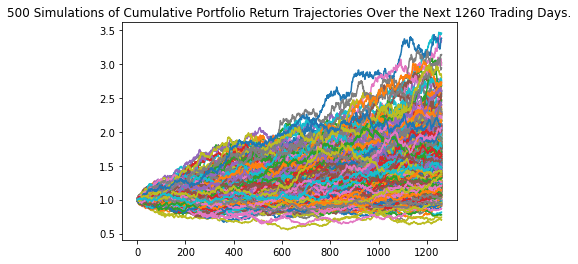

In [94]:
# Plot simulation outcomes
Line_plot_5 = Monte_Carlo_even_5_dist.plot_simulation()

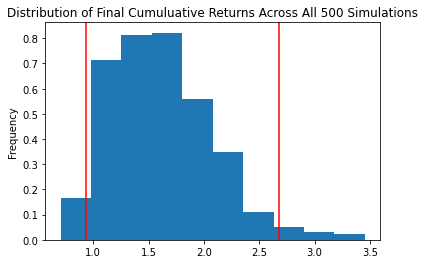

In [95]:
# Plot probability distribution and confidence intervals
Dist_plot_5 = Monte_Carlo_even_5_dist.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
Sum_Stats2 = Monte_Carlo_even_5_dist.summarize_cumulative_return()

# Print summary statistics
print(Sum_Stats2)

count           500.000000
mean              1.622249
std               0.458616
min               0.703902
25%               1.262798
50%               1.575501
75%               1.913511
max               3.452599
95% CI Lower      0.935525
95% CI Upper      2.681293
Name: 1260, dtype: float64


In [97]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(Sum_Stats2[8]*initial_investment,2)
ci_upper_five = round(Sum_Stats2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56131.51 and $160877.6


### Ten Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
Monte_Carlo_even_10_dist = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 10)

In [99]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Monte_Carlo_even_10_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004510,0.999066,0.991267,1.016223,1.001172,0.994642,1.012030,0.983588,1.006003,0.999975,...,0.991470,1.009846,1.005206,1.024339,0.999278,1.002520,0.994963,0.998096,0.978372,0.996803
2,1.004661,0.995339,0.999774,0.998528,1.001232,0.996689,1.018060,0.973278,1.010942,1.003397,...,0.987302,1.012412,1.016111,1.034205,1.002225,1.009320,0.993720,1.001311,0.975803,0.989014
3,1.006029,0.993262,1.011496,0.982972,0.996634,1.001740,1.014754,0.972578,1.010157,0.992243,...,0.989017,1.006924,1.022513,1.028335,1.000588,1.010201,0.989322,0.998544,0.975152,0.992282
4,0.992017,0.986597,1.020557,0.977046,1.003717,0.993863,1.007039,0.959322,0.994662,0.987941,...,0.979035,1.016949,1.029053,1.022822,1.002023,1.005443,0.982102,0.998619,0.987699,0.989058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.223741,3.677814,3.230994,3.247464,3.111186,3.240898,1.761450,0.802050,1.904157,1.290855,...,1.809408,2.898818,2.031281,2.037224,1.291237,3.174252,0.969288,6.466417,1.835139,2.456839
2517,1.214882,3.666471,3.255700,3.223529,3.124126,3.263439,1.786809,0.807607,1.908113,1.292480,...,1.817631,2.884574,2.040111,2.033874,1.276546,3.207334,0.968408,6.515881,1.825030,2.461315
2518,1.216061,3.645900,3.222992,3.243703,3.155684,3.244528,1.773521,0.807212,1.915179,1.287828,...,1.844390,2.895627,2.044247,2.021046,1.273577,3.190016,0.972626,6.485584,1.819847,2.455833
2519,1.216248,3.674265,3.241254,3.242504,3.168871,3.200767,1.799900,0.804661,1.914023,1.298483,...,1.842880,2.934354,2.051639,2.042977,1.271216,3.189680,0.974254,6.537510,1.850526,2.441663


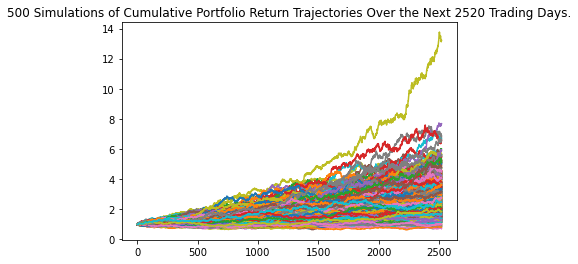

In [100]:
# Plot simulation outcomes
Line_plot_10 = Monte_Carlo_even_10_dist.plot_simulation()

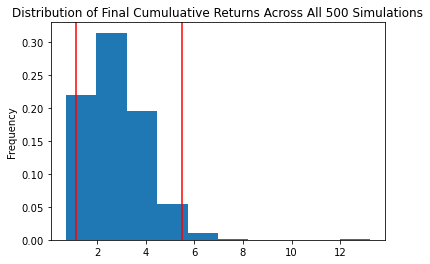

In [101]:
# Plot probability distribution and confidence intervals
Dist_plot_10 = Monte_Carlo_even_10_dist.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
Sum_Stats3 = Monte_Carlo_even_10_dist.summarize_cumulative_return()

# Print summary statistics
print(Sum_Stats3)

count           500.000000
mean              2.785342
std               1.243388
min               0.712091
25%               1.888406
50%               2.544599
75%               3.479506
max              13.225282
95% CI Lower      1.130446
95% CI Upper      5.495002
Name: 2520, dtype: float64


In [103]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(Sum_Stats3[8]*initial_investment,2)
ci_upper_ten = round(Sum_Stats3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67826.79 and $329700.09
